In [1]:
from textblob import TextBlob
from snownlp import SnowNLP
import pandas as pd
import numpy as np


In [2]:
s = "我喜欢你啊。我很讨厌你啊"
ss = SnowNLP(s)
ss.sentences
ss.sentiments

0.8036029098468256

In [3]:
with open("/home/works/data/xuman/sentiment_analysis/allmsg/msg_pos_es_uniq",'r') as fr,\
    open ("/home/works/data/xuman/sentiment_analysis/allmsg/msg_pos_es_uniq_csv",'w') as fw:
    for line in fr:
        fw.write(line.strip()+',')
with open("/home/works/data/xuman/sentiment_analysis/allmsg/msg_neg_es_uniq",'r') as fr,\
    open ("/home/works/data/xuman/sentiment_analysis/allmsg/msg_neg_es_uniq_csv",'w') as fw:
    for line in fr:
        fw.write(line.strip()+',')
         

In [4]:
df_pos = pd.read_csv("/home/works/data/xuman/sentiment_analysis/allmsg/msg_pos_es_uniq_csv",header = None)
df_pos = df_pos.T
df_pos.columns =['评论']

df_neg = pd.read_csv("/home/works/data/xuman/sentiment_analysis/allmsg/msg_neg_es_uniq_csv",header = None)
df_neg = df_neg.T
df_neg.columns =['评论']


In [5]:
df_pos.shape

(3718, 1)

In [6]:
df_neg.shape

(3918, 1)

In [7]:
df = pd.concat([df_pos,df_neg],ignore_index = True,axis = 0)
df['scores'] = '好评'
df.iloc[3718:,1] = '差评'
df.head()



,评论,scores
0,NaN,好评
1,1.76人喜欢自己,好评
2,3G的好用吗,好评
3,4好厉害,好评
4,7哥厉害,好评


In [8]:
tmp = df['scores'].value_counts()
tmp['好评']
r='{}({:.2f}%)'.format(tmp['好评'],tmp['好评']*100/122)
r

'3718(3047.54%)'

In [9]:
# stopwords='/home/works/data/xuman/sentiment_analysis/stopwords/chinese.txt'
# if isinstance(stopwords,str):
#         f=open(stopwords,encoding='utf-8')
#         stopwords=f.readlines()
#         stopwords=[s.strip() for s in stopwords]
        

In [10]:
# -*- coding: utf-8 -*-
"""
Created on Wed Sep 27 10:17:06 2017
@author: JSong
"""

import numpy as np
import pandas as pd
import re
import os


from gensim import corpora,models#,similarities
from gensim.models.ldamodel import LdaModel
import jieba
import jieba.analyse as analyse
from orangecontrib import associate
# associate.frequent_itemsets(X, min_support=0.2)
# associate.association_rules(itemsets, min_confidence, itemset=None)
from snownlp import SnowNLP



#import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#from sklearn.decomposition import TruncatedSVD, NMF, LatentDirichletAllocation
#from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection.univariate_selection import f_classif #,chi2 


#import logging
#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


def jieba_cut(texts,userdict=None,stopwords=None,POS=False,add_words=[]):
    '''
    对中文文本进行分词，并将分词结果用空格隔开
    注：该函数不会删除样本
    parameter
    ---------
    texts: 可迭代文本对象，每一个对应着一个一份文档
    add_words: 自己添加的 jiaba 词典
    stopwords：停止词，用于分词
    POS：词性标注，默认不标注
    return
    ------
    texts: pd.Series格式，将分词后的结果用空格隔开，如： 这 手机 不错
    '''
    '''

    '''
    
    '''结巴分词词性对照表
    a:形容词,ad 副形词,an 名形词,ag 形容词性语素,al 形容词性惯用语
    b:区别词,bl 区别词性惯用语
    c:连词,cc 并列连词
    d:副词
    e:叹词
    f:方位词
    h:前缀
    k:后缀
    m:数词,mq 数量词
    n:名词,nr 人名,ns 地名,nt 机构团体名,nz 其它专名,nl 名词性惯用语,ng 名词性语素
    o 拟声词
    p 介词,pba 介词“把”,pbei 介词“被”
    q 量词,qv 动量词,qt 时量词
    r 代词,rr 人称代词,rz 指示代词,ry 疑问代词,rg 代词性语素
    s 处所词,t 时间词,u 助词,v 动词,w 标点符号,x 字符串,y 语气词(delete yg),z 状态词
    '''
    '''
    userdict='mobile_dict.txt'
    stopwords='.\\stopwords\\chinese.txt'
    add_words=color
    POS=True
    texts=tt.texts_raw
    '''
    stopwords='/home/works/data/xuman/sentiment_analysis/stopwords/chinese.txt'
    
    if  userdict is not None:
        jieba.load_userdict(userdict)
    if isinstance(stopwords,str):
        f=open(stopwords,encoding='utf-8')
        stopwords=f.readlines()
        stopwords=[s.strip() for s in stopwords]

    if isinstance(texts,pd.core.series.Series):
        index=texts.index
    else:
        index=range(len(texts))

    texts='燚燚燚'.join(texts)# 为了分词用
    
    # 新方法，为了能有识别新词能力，我们把语料合并分词
    jieba.add_word('燚燚燚')
    # 去掉分词结果中一份评论全是字母或数字的情况
    pattern=re.compile(r'~|\[|\]|\s[a-z\.]+\s|^[a-z\.]+\s|\s[a-z\.]+$|\s[\d\.]+\s|^[\d\.]+\s|\s[\d\.]+$')
    if POS:
        from jieba import posseg
        tmp=posseg.lcut(texts)
        texts=' '.join([w.word for w in tmp if w.word not in stopwords]).split('燚燚燚')
        texts=list(map(lambda x:re.sub(r'\s+',' ',re.sub(pattern,' ',x).strip()),texts))
        texts=pd.Series(texts,index=index)
        words_pos=dict(tmp)
        return texts,words_pos
    else: 
        texts=' '.join([w for w in jieba.cut(texts,cut_all = False) if w not in stopwords]).split('燚燚燚')
        texts=list(map(lambda x:re.sub(r'\s+',' ',re.sub(pattern,' ',x).strip()),texts))
        texts=pd.Series(texts,index=index)
        print(texts)
        return texts





class Reviews():
    """初始化"""
    def __init__(self, texts=None,scores=None,creationTime=None,data=None,language='cn'):
        '''初始化需要两个数据，一份是评论，一份是评分
        如果给定data,则texts和scores是对应的列名字，否则contents是具体的数组
        评论数据支持以下字段：
        评论：texts
        评分：scores
        评论时间：creationTime      
        '''
        if data is not None:
            '''此时contents和scores肯定存在'''
            if isinstance(texts,str):
                texts=data[texts]
            if isinstance(scores,str):
                scores=data[scores]
            if isinstance(creationTime,str):
                creationTime=data[creationTime]
        if not(isinstance(scores,pd.core.series.Series)):
            scores=pd.Series(scores)
        if not(isinstance(texts,pd.core.series.Series)):
            texts=pd.Series(texts)
        if not(isinstance(creationTime,pd.core.series.Series)):
            creationTime=pd.Series(creationTime)
        if texts is not None:
            texts=texts.map(lambda x:self.cleaning(x))
            ind=texts.map(lambda x:len('%s'%x)>2)
            texts=texts[ind].reset_index(drop=True)
        if scores is not None:
            scores=scores[ind].reset_index(drop=True)
            scores=scores.replace({1:'差评',2:'中评',3:'中评',4:'好评',5:'好评'})
        if creationTime is not None:
            creationTime=pd.to_datetime(creationTime)
        self.texts_raw=texts#原始语料
        self.scores=scores
        self.creationTime=creationTime
        self.language=language#暂时只适配中文，后期会适配英文、德文等
        self.texts_seg=None
        self.texts_vec_idf=None#(向量化稀疏数组,words)
        self.texts_vec_tf=None#(向量化稀疏数组,words)
        self.pos={}
        self.initial_length=len(texts) if texts is not None else 0# 语料的初始样本数
        
    def __len__(self):
        return len(self.texts_raw)
        
        
    def describe(self):
        r=pd.Series(index=['样本数','平均字符数','好评','差评'])
        n=len(self.texts_raw)
        r['样本数']='{:.0f}'.format(n)
        r['平均字符数']='{:.1f}'.format(self.texts_raw.map(lambda x:len(x)).mean())
        tmp=self.scores.value_counts()
        r['好评']='{}({:.2f}%)'.format(tmp['好评'],tmp['好评']*100/n)
#         r['中评']='{}({:.2f}%)'.format(tmp['中评'],tmp['中评']*100/n)
        r['差评']='{}({:.2f}%)'.format(tmp['差评'],tmp['差评']*100/n)
        return r


    def cleaning(self,text):

        '''中文标点符号处理
        ():\u0028、\u0029
        。:\u3002
        .:\u002e
        ？:\uff1f
        ?:\u003f
        ！:\uff01
        !:\u0021
        ，:\uff0c
        ,:\u002c
        、:\u3001
        ；:\uff1b
        ;:\u003b
        ：:\uff1a
        ::\u003a
        -:\u2500
        …:\u2026
        《:\u300a
        》:\u300a
        〈:\u3008
        〉:\u3009
        '''
        text='%s'%text
        text=text.lower()# 小写
        text = text.replace('\r\n'," ") #新行，我们是不需要的
        text = text.replace('\n'," ") #新行，我们是不需要的
        text = re.sub(r"-", " ", text) #把 "-" 的两个单词，分开。（比如：july-edu ==> july edu）
        text = re.sub(r"\d+/\d+/\d+", "", text) #日期，对主体模型没什么意义
        text = re.sub(r"[0-2]?[0-9]:[0-6][0-9]", "", text) #时间，没意义
        text = re.sub(r"[\w]+@[\.\w]+", "", text) #邮件地址，没意义
        text = re.sub(r"&hellip;|&mdash;|&ldquo;|&rdquo;", "", text) #网页符号，没意义
        text = re.sub(r"&[a-z]{3,10};", " ", text) #网页符号，没意义
        text = re.sub(r"/[a-zA-Z]*[:\//\]*[A-Za-z0-9\-_]+\.+[A-Za-z0-9\.\/%&=\?\-_]+/i", "", text) #网址，没意义
        text = '' if re.findall('^[a-z\d\.\s]+$',text) else text # 全是字母/数字/空格/.就去掉
        text = re.sub('[a-z\.]{6,}',' ',text)#去掉英文单词，无效英文等。仅保留产品型号等英文字母
        text = re.sub('，',',',text)#
        text = re.sub('。','.',text)#
        text = re.sub('！','!',text)#
        text = re.sub('？','?',text)#
        text = re.sub(u'[^\u4e00-\u9fa5\u0000-\u007f]+',' ',text)#只保留中文、以及Unicode到字母z的那段（不包含中文标点符号）
        return text



    def cut_sentences(self,texts=None,method='whole'):
        '''将文本分割成句子'''
        if texts is None:
            texts=self.texts_raw
        if method == 'whole':
            pattern=re.compile(r'[\.?!]')
        elif method == 'part':
            pattern=re.compile(r'\.?!,、~')
        else:
            pattern=re.compile(r'[\.?!]')
        def _sentence(text):
            q=re.split(pattern,text[0])
            if len(q[-1])==0:
                q=q[:-1]
            return q
        texts=texts.map(_sentence)
        return texts


    def find_keywords(self,keywords,scores = None,texts=None):
        '''根据给定的关键词在评论预料中查找到相应的句子（非整条评论）
        该函数被设计为全局函数，即可直接使用：Reviews.find_keywords('拍照',texts)
        keywords='拍照|照片'
        暂时只适合中文
        '''
        def _keywords_find(s):
            kf=re.compile('[\u4e00-\u9fa5\u0061-\u007a\u0030-\u0039]{0,}'+keywords+'[\u4e00-\u9fa5\u0061-\u007a\u0030-\u0039]{0,}')
            tmp=re.findall(kf,s)
            if tmp:
                sentenses=' | '.join(tmp)
            else:
                sentenses=np.nan
            return sentenses
        if (self.texts_raw is None) and (texts is not None):
            if scores == None:
                texts_keywords=texts.map(_keywords_find)
            else:
                texts_keywords=texts[self.scores == scores].map(_keywords_find)
        else:
            if scores == None:
                texts_keywords=self.texts_raw.map(_keywords_find)
            else:
                texts_keywords=self.texts_raw[self.scores == scores].map(_keywords_find)
        texts_keywords=texts_keywords[texts_keywords.notnull()]
        return texts_keywords


    def _isrubbish(self,x,keywords):
        flag=False
        x=('%s'%x).strip()
        x=re.sub(r'\s+',' ',x)
        if len(x)==0:
            flag=True
        else:
            words=x.split(' ')
            rate=len(set(words)&set(keywords))/len(words)
            flag=True if rate>=0.5 else False
        return flag

    
    def drop_invalid(self,initial_words=[],max_rate=0.8,show_invalid=False):
        '''去除无效评论
        1、根据给定的初始无效关键词，寻找所有相似的词语
        2、统计无效关键词的占比，大于max_rate的则判定为无效评论
        parameter
        --------
        initial_words: 初始的无效评论关键词
        max_rate: 一个评论中，如果垃圾关键词占比超过max_rate,则会判定为无效
        show_invalid: 如果为真，则函数返回 self,texts_invalid
        
        return
        ------
        self
        返回的是逻辑索引
        '''
        if self.texts_seg is None:
            print('该对象还未分词，请检查')
            return self
        texts_vec,words=self.vectorizer(store=False)
        texts_feature=np.dot(texts_vec.T,texts_vec)
        feature_norm=np.sqrt(texts_feature.diagonal())
        texts_feature=texts_feature/np.dot(feature_norm.reshape((-1,1)),feature_norm.reshape(1,-1))
        texts_feature=texts_feature-np.eye(texts_feature.shape[0])
        similar_words=[]
        for w in initial_words:
            if w in words:
                ind=np.argwhere(words==w)[0][0]
                #ind=words.index(w)
                tmp=texts_feature[:,ind]
                a,b=np.where(tmp>=max_rate)
                similar_words+=[words[i] for i in a]
        invalid=self.texts_seg.map(lambda x:self._isrubbish(x,similar_words))
        if show_invalid:
            texts_invalid=self.texts_raw[invalid]
        self.texts_raw=self.texts_raw[~invalid]
        if id(self.texts_raw) != id(self.texts_seg):
            self.texts_seg=self.texts_seg[~invalid]
        if self.scores is not None:
            self.scores=self.scores[~invalid]
        if show_invalid:
            return self,texts_invalid
        else:
            return self

    def replace(self,synonyms):
        '''同义词等替换，如将老爸替换成爸爸，apple替换成苹果之类的
        words_dict: dict字典或者text文件路径
        '''
        if isinstance(synonyms,str) and os.path.exists(synonyms):
            f=open(synonyms,encoding='utf-8')
            add_words=f.readlines()
            synonyms=dict(list(map(lambda x:re.sub('：',':',x.strip()).split(':'),add_words[1:])))

        def _sub_replace(text):
            for k in synonyms:
                text=re.sub(k,synonyms[k],text)
            return text
        self.texts_raw=self.texts_raw.map(_sub_replace)
        return self 
    

    def segment(self,product_dict=[],stopwords=[],add_words=[]):
        '''
        对中文文本进行分词，并将分词结果用空格隔开
        parameter
        ---------
        product_dict: 自己添加的 jiaba 词典
        stopwords：停止词，用于分词
        
        具体参见函数：jieba_cut
        '''
        
        if self.language in ['cn']:
            texts_seg,words_pos=jieba_cut(self.texts_raw,userdict=product_dict,\
            stopwords=stopwords,POS=True,add_words=add_words)
#             print(' '.join(texts_seg))
        elif self.language in ['en']:
            # 待完善
            texts_seg=None
            words_pos=None
        self.texts_seg=texts_seg
        self.pos=words_pos
        return self


    def vectorizer(self,vec_model='idf',select_features=None,store=True,**kwargs):
        '''对语料向量化
        vec_model: tfidf/idf、tf、word2vec等
        对象默认会存储idf和tf分词结果，便于复用
        '''
        if vec_model in ['idf','tfidf']:
            myvectorizer = TfidfVectorizer(min_df=2,max_df=0.95,ngram_range=(1,2),sublinear_tf=True,**kwargs)
        else:
            myvectorizer = CountVectorizer(**kwargs)
        texts_vec = myvectorizer.fit_transform(self.texts_seg)
        #texts_vec=texts_vec.toarray()
        words=np.array(myvectorizer.get_feature_names())
        if select_features is not None:
            n_features_initial=texts_vec.shape[1]
            n_features=min(n_features_initial,select_features)
            if 'score_func' in kwargs:
                score_func=kwargs['score_func']
            else:
                score_func=f_classif
            selector = SelectKBest(score_func,k=n_features).fit(texts_vec,self.scores)
            informative_words_index = selector.get_support(indices=True)
            words = np.array([words[i] for i in informative_words_index])
            texts_vec=texts_vec[:,informative_words_index]
        if store and (vec_model in ['idf','tfidf']):
            self.texts_vec_idf=(texts_vec,words)
        elif store and (vec_model in ['tf']):
            self.texts_vec_tf=(texts_vec,words)
        return texts_vec,words
 
    def get_keywords(self,condition=None,topK=20):
        ''' 返回语料的关键词，算法是textrank
        '''
        if condition is not None:
            texts=' '.join(self.texts_raw[condition])
        else:
            texts=' '.join(self.texts_raw)
         
        keywords=analyse.textrank(texts,topK=topK)
        return keywords



    def dis_of_pairwords(self,pair_words,texts=None):
        '''返回两个词在评论预料中的距离
        用于检测两个词是否常常放在一起用，例如手机、便宜会出现在一起，但拍照、便宜就不会出现在一起
        parametre
        --------
        pair_words:['手机','不错']
        texts: 语料
        '''
        if self.texts_raw is not None:
            texts=self.texts_raw
        dis=[]
        pattern=re.compile(pair_words[0]+'.*?'+pair_words[1]+'|'+pair_words[1]+'.*?'+pair_words[0])
        for text in texts:
            tmp=re.findall(pattern,text)
            dis0=len(tmp[0])-len(pair_words[0])-len(pair_words[1]) if tmp else np.nan
            dis.append(dis0)
        dis=pd.Series(dis)
        dis=dis[dis.notnull()].quantile(0.05,'nearest')
        return dis

    def sentiments(self,condition=None,method='snownlp'):
        '''情感分析'''

        texts=self.texts_raw[condition] if condition is not None else self.texts_raw
        if method in ['snownlp']:
            s=texts.map(lambda x:SnowNLP(x).sentiments)
        return s



    def get_product_features(self,min_support,max_dis_pairwords=4):
        '''从产品评论中挖掘出产品特征词
        parameter
        --------
        texts: 空格分开的语料
        pos：词性标注dict，关注其中的名词：n和形容词：a
        min_support: 最小支持度
        
        return
        ------
        features:特征词列表
        '''
    
        if self.texts_vec_tf is None:
            self.vectorizer(vec_model='tf')
        texts_vec_tf,words=self.texts_vec_tf
        # 第一步，利用关联分析找到初始的特征词
        gen=associate.frequent_itemsets(texts_vec_tf, min_support=min_support)
        sup=[[words[i] for i in s[0]] for s in gen if len(s[0])==2]
        # 第二步 筛选出 一个为名词，一个为形容词的特征，同时将名词排前面
        sup=[sorted(s,key=lambda x:self.pos[x][0]!='n') for s in sup if set([self.pos[s[0]],self.pos[s[1]][0]])==set(['n','a'])]   
        # 第三步 从中选出名词和形容词配对那些特征词
        sup=[kw for kw in sup if self.dis_of_pairwords(kw)<max_dis_pairwords]     
        features_frequent=list(set([s[0] for s in sup]))
        opinion_words=list(set([s[1] for s in sup]))
#         print('opinion_words',opinion_words)
        # 第四步 通过意见词找其他词
        def _feature_find(texts,opinion):
            # 计算由keywords_agg()生成的语料
            pattern1=re.compile(r'([^\s]*?)/n[^n]*?'+opinion)
            pattern2=re.compile(r''+opinion+'/a[^n]*?\s([^\s]*?)/n')
            feature_words=[]
            for docs in texts: 
                doc=docs.split(' | ')
                for s in doc:
                    words=jieba.posseg.cut(s)
                    tmp=' '.join([w.word+'/'+w.flag for w in words])
                    fw1=re.findall(pattern1,tmp)
                    fw2=re.findall(pattern2,tmp)
                    feature_words+=fw1
                    feature_words+=fw2
            return feature_words
            
            # 找到里面的名词再找到意见词，返回距离最近的那一组
        fw_raw=[]
        for ow in opinion_words:
            texts_key=self.find_keywords(ow)
            fw_raw+=_feature_find(texts_key,ow)
        features_infrequent=[fw for fw in set(fw_raw) if fw_raw.count(fw)>2]
        features=list(set(features_frequent+features_infrequent))
        features=[f for f in features if len(f)>1]#去掉单个字的特征
        return features


    def features_sentiments(self,features=None,thr=0.5,method='snownlp'):
        '''产品特征词的情感分析
        parameter
        --------
        features: 产品特征词，如：内存、续航、拍照等
        thr：情感判断，当大于thr时，判定为正面意见。默认为0.5
        return
        ------
        features_opinion：DataFrame 格式，各个特征词的提及数、正面意见占比，负面意见占比
        features_corpus：dict格式，原始语料中提及到特征的句子以及对应的情感分析
        '''
        if features is None:
            features=self.get_product_features()
        features_opinion=pd.DataFrame(index=features,columns=['total','mention_count','p_positive','p_negative'])
        features_corpus={}
        N=len(self.texts_raw)
        for fw in features:
            texts_fw=self.find_keywords(fw)
            if len(texts_fw)==0:
                features_opinion.loc[fw,:]=[N,0,np.nan,np.nan]
                features_corpus[fw]=texts_fw
                continue
            features_corpus[fw]=texts_fw
            #features_corpus[fw]=' || '.join(texts_fw)
            if method == 'snownlp':
                thr1=(self.scores=='差评').sum()/N
                thr2=(self.scores.isin(['差评','中评'])).sum()/N
                sc=texts_fw.map(lambda x:SnowNLP(x).sentiments)
                features_corpus[fw]=pd.concat([texts_fw,sc],axis=1)
                features_corpus[fw].columns=['sentences','sentiments']
                p_positive=len(sc[sc>thr2])/len(sc) if len(sc)>0 else np.nan
                p_negative=len(sc[sc<=thr1])/len(sc) if len(sc)>0 else np.nan
                p=len(sc[sc>thr])/len(sc) if len(sc)>0 else np.nan
                features_opinion.loc[fw,:]=[N,len(sc),p,1-p]
            elif method == 'score':
                tmp=self.scores[texts_fw.index].value_counts()
                p_positive=tmp['好评']/len(texts_fw) if '好评' in tmp else 0
                p_negative=tmp['差评']/len(texts_fw) if '差评' in tmp else 0
                features_opinion.loc[fw,:]=[N,len(texts_fw),p_positive,p_negative]
            #features_opinion[fw]=(len(sc),'{:.2f}%'.format(p*100),'{:.2f}%'.format(100-p*100))
        return features_opinion,features_corpus

    def find_topic(self,condition=None,n_topics=10,n_words=10,topic_model='lda',vec_model='tf',show=True,**kwargs):
        '''主题模型，和上面那个函数，优先使用该函数
        parameter
        ---------
        condition: 语料逻辑值，可以用于专门对好评/差评进行主题分解
        n_topics: 主题数
        n_words: 每个主题输出的词语数
        vec_model: 向量化方法，默认是tf
        '''
        if condition is not None:
            texts=self.texts_seg[condition]
        else:
            texts=self.texts_seg
        if topic_model in ['lda','LDA']:
            dictionary = corpora.Dictionary([doc.split(' ') for doc in texts])
            corpus = [dictionary.doc2bow(text.split(' ')) for text in texts]
            if vec_model in ['idf','tfidf']:
                tfidf = models.TfidfModel(corpus)
                corpus = tfidf[corpus]
            lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=n_topics)
            topics_keywords=lda.show_topics(num_topics=n_topics, num_words=n_words,formatted=False)
            if show:
                print('\n'.join(['主题 {}: {}'.format(i,' | '.join([k[0] for k in \
                topic[1]])) for i,topic in enumerate(topics_keywords)]))
            return topics_keywords

    def genwordcloud(self,condition=None,filename=None,mask=None,background_color='white',\
                    font_path='DroidSansFallback.ttf',imshow=True,**kwargs):
        '''生成词云
        # mask 是RGBA模式，最后一个分量是alpha通道, 如：mask_circle.png
        '''
        from PIL import Image
        from wordcloud import WordCloud
        
        if (filename is not None) and (len(re.findall('[\u4e00-\u9fa5]+',filename))>0):
            filename=' '.join(SnowNLP(filename).pinyin)
        elif filename is None:
            filename='wordcloud gen'
        if condition is not None:
            contents=self.texts_seg[condition]
        else:
            contents=self.texts_seg
        contents=''.join(contents)
#         print('contents',contents)
        if mask is None:
            tmp=np.zeros((900,1200),dtype=np.uint8)
            for i in range(tmp.shape[0]):
                for j in range(tmp.shape[1]):
                    if (i-449.5)**2/(430**2)+(j-599.5)**2/(580**2)>1:
                        tmp[i,j]=255
            mask=np.zeros((900,1200,4),dtype=np.uint8)
            mask[:,:,0]=tmp
            mask[:,:,1]=tmp
            mask[:,:,2]=tmp
            mask[:,:,3]=255
        else:
            mask=np.array(Image.open(mask))
        wordcloud = WordCloud(background_color = background_color,font_path=font_path, mask = mask,collocations=False)
        wordcloud.generate(contents)
        if imshow:
            fig = plt.figure(dpi=300)
            ax = fig.add_subplot(111)
            ax.imshow(wordcloud.to_image())
            ax.axis('off')
            ax.set_title(filename)
        else:
            wordcloud.to_image().save(filename+'.png')
        keywords=[(w[0][0],w[0][1],w[1],w[2][0],w[2][1]) for w in wordcloud.layout_]
        comments_keys=pd.DataFrame(keywords,columns=['key','count','font_size', 'position_x','position_y'])
        return  comments_keys







In [11]:
comments = Reviews(texts = df['评论'],scores = df['scores'])
comment_describe = comments.describe()
comment_describe


样本数              7485
平均字符数             7.1
好评       3678(49.14%)
差评       3807(50.86%)
dtype: object

In [12]:
comments = comments.segment( )
comments = comments.drop_invalid()
comments.describe()

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.733 seconds.
Prefix dict has been built succesfully.


样本数              7431
平均字符数             7.1
好评       3624(48.77%)
差评       3807(51.23%)
dtype: object

acc = 26.38%, AUC = 0.181%


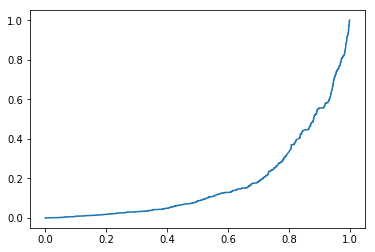

In [13]:
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
ss = comments.sentiments(method = 'snownlp')
acc = metrics.accuracy_score(comments.scores,(pd.cut(ss,2,labels = ['好评','差评'])))
scores_bin = comments.scores.replace({'好评': -1, '差评': 1})
fpr, tpr, thresholds = metrics.roc_curve(scores_bin, ss)
auc = metrics.roc_auc_score(scores_bin, ss)
print('acc = {:.2f}%, AUC = {:.3f}%' .format(acc * 100, auc) )
plt.plot(fpr,tpr)

In [14]:
# ss = comments.sentiments(method = 'snownlp')
# pd.cut(ss,2,labels = ['好评','差评'])
comments.segment( )

好评的关键词是： 喜欢|满意|棒棒|真棒|服务|贴心|好评|可爱|觉得|图片|助理|感觉|样子|机器人|知道|好用|星座|体验|软件|感谢
主题 0: 喜欢 | 厉害 | 棒 | 不错 | 好评 | 真好 | 你好 | 说 | 太 | 助理
主题 1: 棒棒 | 哒 | 满意 | 喜欢 | 贴心 | 不错 | 挺 | 真 | 用 | 服务
主题 2: 喜欢 | 不错 | 聪明 | 太棒 | 谢谢 | 真棒 | 机器人 | 感谢 | 朋友 | 厉害
主题 3: 真 | 赞 | 点 | 满意 | 很棒 | 真棒 | 可爱 | 不错 | 太 | 贴心
主题 4: 谢谢 | 喜欢 | 赞 | 太棒了 | 真的 | 不错 | 好评 | 真好 | 棒 | 你好
差评的关键词是： 讨厌|傻子|傻瓜|打卡|滚蛋|生成|服务|不能|取消|语音|差评|出来|犊子|机器人|服务态度|满意|助理|没有|去死吧|傻蛋
主题 0: 死 | 傻子 | 好烦 | 哈哈哈 | 烦死 | 滚蛋 | 真的 | 很傻 | 想 | 说
主题 1: 讨厌 | 烦恼 | 真 | 傻 | 烦躁 | 烦 | 日 | 逼 | 太 | 有点烦
主题 2: 傻 | 逼 | 说 | 烦 | 死去 | 很烦 | 妈 | 心烦 | 真的 | 傻子
主题 3: 滚 | 打卡 | 图 | 生成 | 烦 | 烦人 | 去死吧 | 讨厌 | 特别 | 想
主题 4: 逼 | 妈 | 傻 | 他妈的 | 傻瓜 | 评 | 差 | 操 | 取消 | 爱


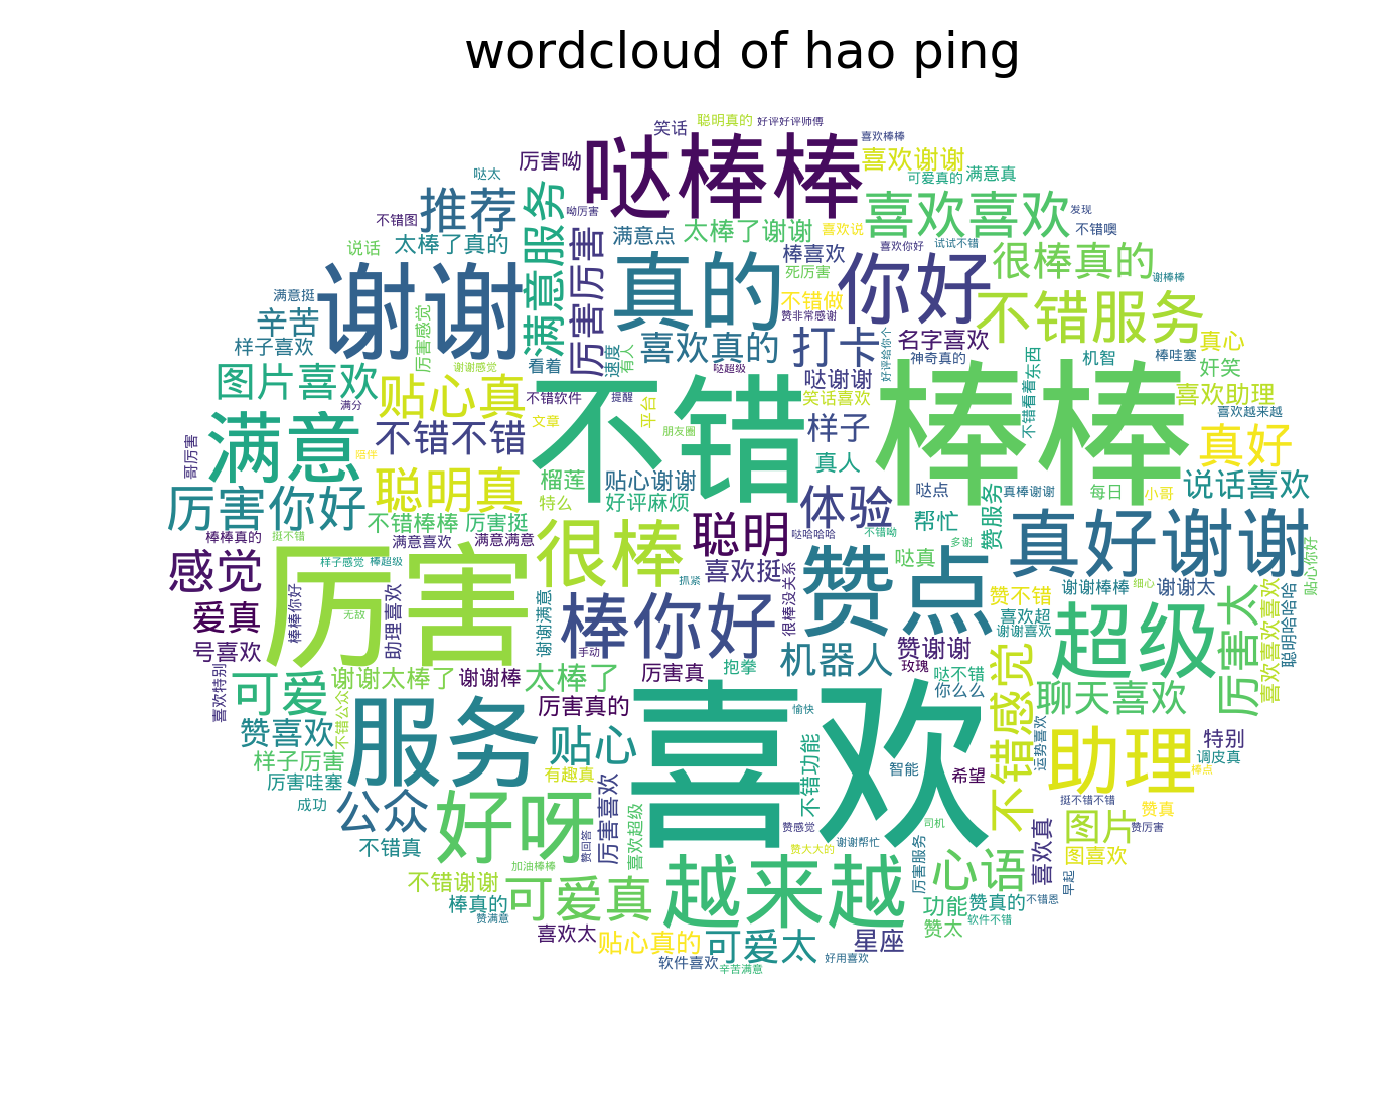

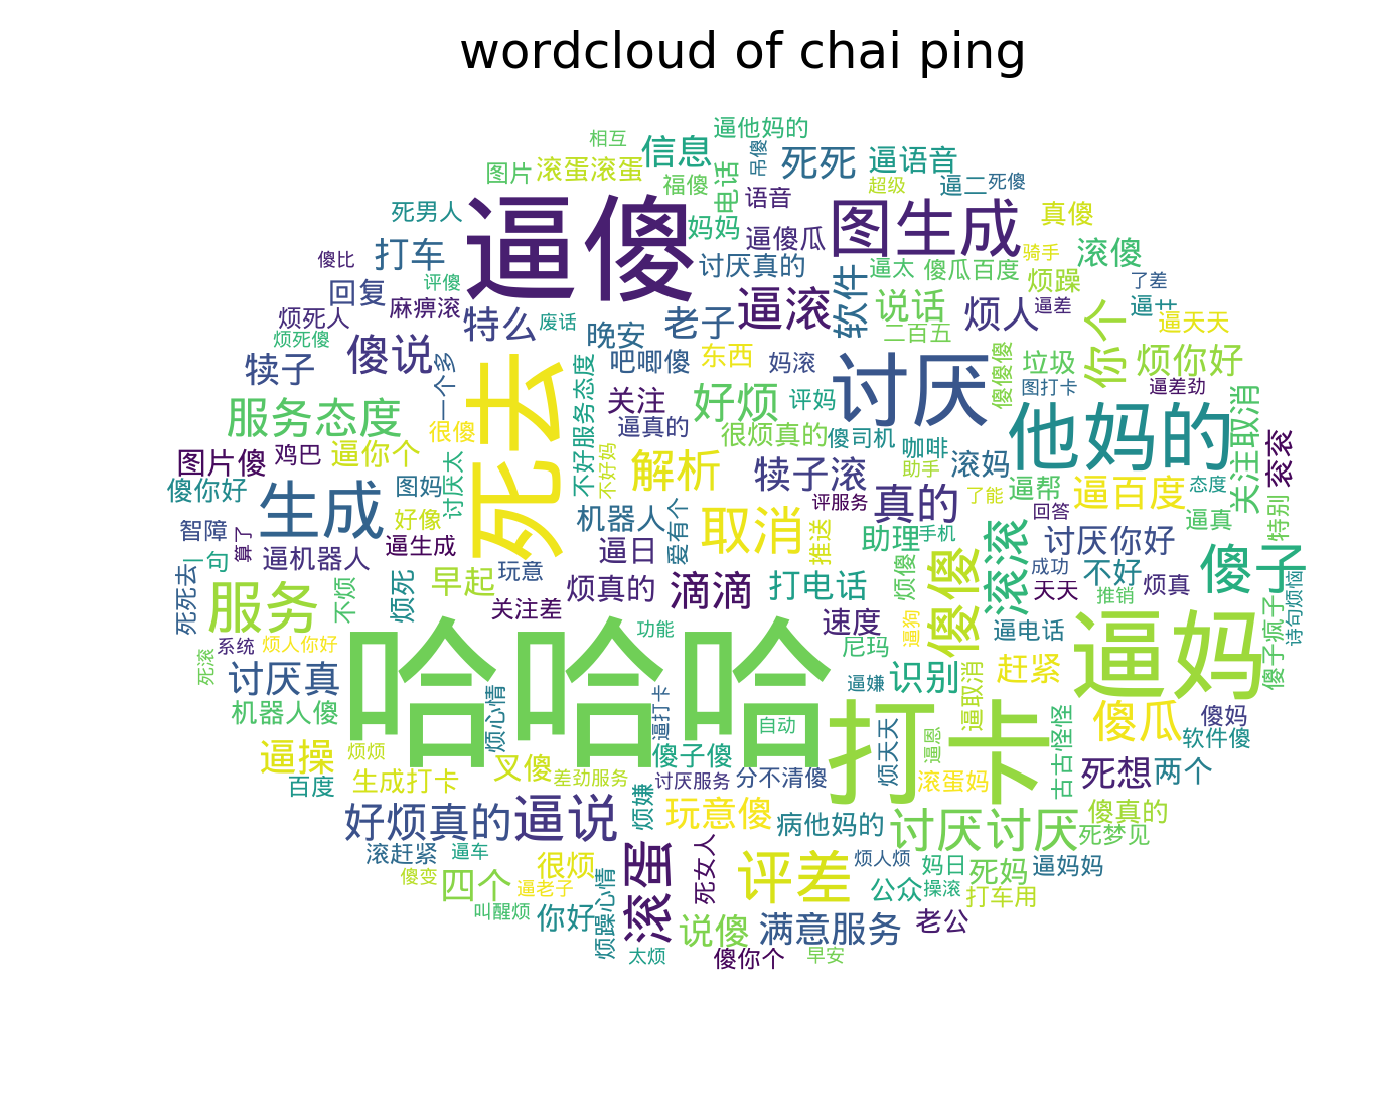

In [15]:
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
for k in (['好评', '差评']):
    #textrank 关键词
    keywords = comments.get_keywords(comments.scores == k)
    print('{}的关键词是： '.format(k) + '|'.join(keywords))
    #主题分解
    comments.find_topic(condition = (comments.scores == k), n_topics = 5)
    filename = 'wordcloud of {}'.format(k)
    comments.genwordcloud(comments.scores == k, filename = filename)
    print('=' *20)

In [16]:
features = comments.get_product_features(min_support = 0.0002)
np.array(features).T

array(['智能', '爸爸', '效果', '速度', '整体', '软件', '语音', '有点', '用户', '效率', '建议',
       '文章', '机器人', '棒棒', '图片', '总体', '东西', '意思', '体验', '机智', '老公', '客户',
       '朋友', '样子', '诗句', '名字', '真棒', '傻子', '电话', '宝宝', '信息', '评价', '平台',
       '晚安', '方法', '班班', '谢谢', '作文', '公众', '功能', '头像', '心情', '产品', '感觉'],
      dtype='<U3')

In [17]:
text_fw = comments.find_keywords('客服')
comments.scores[text_fw.index].value_counts()

差评    8
好评    3
Name: scores, dtype: int64

In [29]:
features_new = list(set(features) - set(['客户', '感觉', '信息', '作文', '电话', '真棒', '有点','老公',
                                         '建议', '名字', '谢谢', '公众','傻子', '爸爸', '宝宝',
                                         '心情', '班班','用户',  '机智', '评价', '样子', '意思',
                                         '智能', '棒棒','朋友', '伊然',  '晚安', '东西','方法']) \
                    | set(['打卡','心语签','打车','咖啡','星座','客服','效率']) )
np.array(features_new).T


array(['机器人', '心语签', '图片', '打卡', '总体', '功能', '头像', '客服', '软件', '咖啡', '打车',
       '星座', '平台', '体验', '效率'], dtype='<U3')

In [30]:
features_opinion, features_corpus = comments.features_sentiments(features_new,method = 'score')
print(features_opinion.sort_values('mention_count',ascending = False))

    total mention_count p_positive p_negative
打卡   7431           106       0.10       0.90
机器人  7431            63       0.60       0.40
图片   7431            48       0.75       0.25
软件   7431            43       0.53       0.47
功能   7431            30       0.70       0.30
体验   7431            23       0.74       0.26
打车   7431            20       0.10       0.90
星座   7431            20       0.75       0.25
客服   7431            11       0.27       0.73
心语签  7431            10       0.80       0.20
平台   7431            10       0.90       0.10
效率   7431             8       1.00          0
总体   7431             7       1.00          0
头像   7431             6       0.83       0.17
咖啡   7431             6       0.17       0.83


In [31]:
print('被提及次数大于10次且好评率大于50%的特征')
print(features_opinion[(features_opinion['p_positive'] > 0.5) \
                       & (features_opinion['mention_count'] > 10)]\
                         .sort_values('p_positive', ascending = False))
print('\n')
print('被提及次数大于10次且差评大于40%的特征')
print(features_opinion[(features_opinion['p_negative'] > 0.3) \
                       & (features_opinion['mention_count'] > 10)]\
                         .sort_values('p_negative', ascending = False))


被提及次数大于10次且好评率大于50%的特征
    total mention_count p_positive p_negative
图片   7431            48       0.75       0.25
星座   7431            20       0.75       0.25
体验   7431            23       0.74       0.26
功能   7431            30       0.70       0.30
机器人  7431            63       0.60       0.40
软件   7431            43       0.53       0.47


被提及次数大于10次且差评大于40%的特征
    total mention_count p_positive p_negative
打车   7431            20       0.10       0.90
打卡   7431           106       0.10       0.90
客服   7431            11       0.27       0.73
软件   7431            43       0.53       0.47
机器人  7431            63       0.60       0.40


In [32]:
print('-' * 20 + '客服' + '-'*20)
print('%s:' % '好评',' || ' .join(comments.find_keywords('客服',scores = '好评').head(10)))
print('%s:' % '差评',' || ' .join(comments.find_keywords('客服',scores = '差评').head(10)) + '\n')

print('-' * 20 + '体验' + '-'*20 )
print('%s:' % '好评',' || ' .join(comments.find_keywords('体验',scores = '好评').head(10)) )
print('%s:' % '差评',' || ' .join(comments.find_keywords('体验',scores = '差评').head(10)) + '\n')

print('-' * 20 + '服务' + '-'*20 )
print('%s:' % '好评',' || ' .join(comments.find_keywords('服务',scores = '好评').head(10)) )
print('%s:' % '差评',' || ' .join(comments.find_keywords('服务',scores = '差评').head(10)) + '\n')

print('-' * 20 + '效率' + '-'*20 )
print('%s:' % '好评',' || ' .join(comments.find_keywords('效率',scores = '好评').head(10)) )
print('%s:' % '差评',' || ' .join(comments.find_keywords('效率',scores = '差评').head(10)) + '\n')

print('-' * 20 + '打卡' + '-'*20 )
print('%s:' % '好评',' || ' .join(comments.find_keywords('打卡',scores = '好评').head(10)) )
print('%s:' % '差评',' || ' .join(comments.find_keywords('打卡',scores = '差评').head(10)) + '\n')

--------------------客服--------------------
好评: 比较喜欢贴心的客服 || 给你们客服点个赞 || 好厉害的客服
差评: 还当你奶奶逼的客服傻逼 || 客服就是傻逼 || 客服 || 你们的客服太烦人了 || 客服 || 傻逼客服 || 傻客服 || 客服不回话

--------------------体验--------------------
好评: 体验还是很不错的嘛 || 体验不错 || 服务很好客户体验也不错 || 好的客户服务体验非常棒 || 很满意的一次服务体验 || 来也这个功能也很棒可以体验下 || 满意的体验 || 你们的体验还是很不错的 || 体验不错 || 体验很不错啥都没管
差评: 第一次体验大大的差评 || 很差劲的体验 || 这体验好差劲 || 真是傻透了的体验 || 真是傻透了的体验 || 总之这次体验很不好差评

--------------------服务--------------------
好评: heart好喜欢你们这个服务点赞 || 但服务绝对不满意 || 对服务不满意 || 对你的服务很满意 || 对你的服务一直都很满意 || 对你们的专业服务表示赞赏 || 非常满意这次的服务 || 非掌满意你的们的服务 || 服务不错 || 服务不错
差评: 包月服务不满意 || 不要您服务 || 差评你你服务不好 || 乘客对航空服务不满意 || 但服务绝对不满意 || 对服务不满意 || 对叫车服务不满意 || 对今天的服务不满意 || 对你和你的手下提供的服务非常不满意 || 对你们服务不满意

--------------------效率--------------------
好评: 好的就喜欢你这么效率 || 效率很高赞 || 你这个效率我相当不满意 || 效率不错啊 || 效率赞 || 效率赞赞的 || 赞效率 || 这次效率不错
差评: 

--------------------打卡--------------------
好评: 还是喜欢最初的打卡签到图 || 还是喜欢最初的打卡设计 || 好喜欢打卡背景图 || 好喜欢这个美美的打卡图片 || 今天的打卡图片我很喜欢 || 突然好喜欢打卡 || 喜欢新版的早起打卡图 || 小来我好喜欢今天早起打卡的背景图 || 赞打

In [34]:
from reportgen import report as rpt
r = rpt.Report(filename = None)
r.add_cover(title = '小来评价信息分析报告')
slides_data = []
comment_describe = comments.describe()
slides_data.append({'title': 'summary',\
                    'data' : '\n'.join(['{}: {}'.format(k,comment_describe[k]) for k in comment_describe.index])})
comments = comments.segment()
warnings.filterwarnings('ignore')
for k in (['好评', '差评']):
    #textrank 关键词
    keywords = comments.get_keywords(comments.scores == k)
    #主题分解
    topic_keywords = comments.find_topic(comments.scores == k,n_topics = 5, show = False)
    summary = '{}的关键词为'.format(k) + ' | '.join(keywords) + '\n'
    summary += '\n'.join(['主题{} : {}'.format(i, '|'.join([ k[0] for k in topic[1]]))\
                         for i, topic in enumerate(topic_keywords)])

    #生成词云
    tmp = {'好评': 'good','差评':'bad'}

    filename = 'wordcloud of {}'.format(tmp[k])
    comments.genwordcloud(comments.scores == k, filename = filename, imshow = False)
    slides_data.append({'title': k + '摘要', 'summary': summary, 'data': filename + '.png'})

features = comments.get_product_features(min_support = 0.001)
features_new = list(set(features) - set(['客户', '感觉', '信息', '作文', '电话', '真棒', '有点','老公',
                                         '建议', '名字', '谢谢', '公众','傻子', '爸爸', '宝宝',
                                         '心情', '班班','用户',  '机智', '评价', '样子', '意思',
                                         '智能', '棒棒','朋友', '伊然',  '晚安', '东西','方法']) \
                    | set(['打卡','心语签','打车','咖啡','星座','客服','效率']) )
features_opinion, features_corpus = comments.features_sentiments(features_new,method = 'score')
features_opinion = features_opinion.sort_values('mention_count',ascending = False)
slides_data.append({'title': '典型意见挖掘', 'summary': '挖掘出的特征'+'|'.join(features_new), \
                    'data': features_opinion, 'slide_type': 'table'})

r.add_slides(slides_data)
r.save('小来用户评价信息分析.pptx')

print('done')

test
test
done


In [23]:
from pptx import Presentation

prs = Presentation()
title_slide_layout = prs.slide_layouts[0]
slide = prs.slides.add_slide(title_slide_layout)
title = slide.shapes.title
subtitle = slide.placeholders[1]

title.text = "Hello, World!"
subtitle.text = "python-pptx was here!"

prs.save('test.pptx')

In [24]:
slides_data.append({'title': 'summary',\
                    'data' : '\n'.join(['{}: {}'.format(k,comment_describe[k]) for k in comment_describe.index])})


In [25]:
comment_describe.index

Index(['样本数', '平均字符数', '好评', '差评'], dtype='object')

In [26]:
s = '哎哟，不错啊    不错不错老公'
s.strip('/t')
s

'哎哟，不错啊    不错不错老公'

In [27]:
4135/1021


4.049951028403526

In [28]:
1021/4135

0.24691656590084643